In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading original dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Loading generated dataset
df2 = pd.read_csv('iris_diff_data2.csv')

In [4]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.0,0.0,0.0,0.0,Iris-setosa
1,1.0,0.0,0.0,0.0,Iris-setosa
2,8.0,0.0,5.0,2.0,Iris-virginica
3,9.0,0.0,5.0,2.0,Iris-virginica
4,10.0,0.0,5.0,2.0,Iris-virginica
...,...,...,...,...,...
9995,14.0,5.0,7.0,2.0,Iris-virginica
9996,14.0,5.0,5.0,3.0,Iris-virginica
9997,14.0,5.0,5.0,4.0,Iris-virginica
9998,14.0,5.0,5.0,2.0,Iris-virginica


In [5]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])
df2['Species'] = LabelEncoder().fit_transform(df2['Species'])


In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [7]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0
2,8.0,0.0,5.0,2.0,2
3,9.0,0.0,5.0,2.0,2
4,10.0,0.0,5.0,2.0,2
...,...,...,...,...,...
9995,14.0,5.0,7.0,2.0,2
9996,14.0,5.0,5.0,3.0,2
9997,14.0,5.0,5.0,4.0,2
9998,14.0,5.0,5.0,2.0,2


In [8]:
#Removing unwanted columns
df = df.drop('Id', axis=1)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
#Dataset info
df.shape

(150, 5)

In [11]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [13]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [14]:
outliers_IF

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF
0,0.0,0.0,0.0,0.0,0,-1
1,1.0,0.0,0.0,0.0,0,-1
2,8.0,0.0,5.0,2.0,2,-1
3,9.0,0.0,5.0,2.0,2,-1
4,10.0,0.0,5.0,2.0,2,-1
...,...,...,...,...,...,...
9995,14.0,5.0,7.0,2.0,2,-1
9996,14.0,5.0,5.0,3.0,2,-1
9997,14.0,5.0,5.0,4.0,2,-1
9998,14.0,5.0,5.0,2.0,2,-1


In [15]:
inliers_IF

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF
4582,5.0,3.0,4.0,2.0,1,1
6449,6.0,3.0,5.0,1.0,2,1
6455,6.0,3.0,3.0,1.0,1,1
7267,7.0,3.0,4.0,2.0,2,1
7268,7.0,3.0,5.0,1.0,2,1
8638,15.0,3.0,5.0,2.0,2,1
8639,15.0,3.0,6.0,2.0,2,1


In [16]:
def is_inlier(row):
    # Sepal length constraint: 4 cm ≤ Sepal length ≤ 8 cm
    if row['SepalLengthCm'] < 4 or row['SepalLengthCm'] >8:
        return -1
    
    # Sepal width constraint: 2 cm ≤ Sepal width ≤ 4.5 cm
    if row['SepalWidthCm'] < 2 or row['SepalWidthCm'] > 4.5:
        return -1
    
    # Petal length and species-specific constraints
    if row['Species'] == 'Iris-setosa':
        # Setosa: 1 cm ≤ Petal length ≤ 1.9 cm
        if row['PetalLengthCm'] < 1 or row['PetalLengthCm'] > 1.9:
            return -1
    elif row['Species'] == 'Iris-versicolor':
        # Versicolor: 3 cm ≤ Petal length ≤ 5.1 cm
        if row['PetalLengthCm'] < 3 or row['PetalLengthCm'] > 5.1:
            return -1
    elif row['Species'] == 'Iris-virginica':
        # Virginica: 4.5 cm ≤ Petal length ≤ 6.9 cm
        if row['PetalLengthCm'] < 4.5 or row['PetalLengthCm'] > 6.9:
            return -1
    
    # Petal width constraint: 0.1 cm ≤ Petal width ≤ 3 cm
    if row['PetalWidthCm'] < 0.1 or row['PetalWidthCm'] > 3:
        return -1
    
    # If all constraints are satisfied, return True
    return 1

In [17]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [18]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF,is_inlier_HW
0,0.0,0.0,0.0,0.0,0,-1,-1
1,1.0,0.0,0.0,0.0,0,-1,-1
2,8.0,0.0,5.0,2.0,2,-1,-1
3,9.0,0.0,5.0,2.0,2,-1,-1
4,10.0,0.0,5.0,2.0,2,-1,-1
...,...,...,...,...,...,...,...
9995,14.0,5.0,7.0,2.0,2,-1,-1
9996,14.0,5.0,5.0,3.0,2,-1,-1
9997,14.0,5.0,5.0,4.0,2,-1,-1
9998,14.0,5.0,5.0,2.0,2,-1,-1


In [19]:
inliers_HW

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF,is_inlier_HW
2877,4.0,4.0,0.0,1.0,1,-1,1
2878,4.0,3.0,0.0,1.0,1,-1,1
2879,4.0,2.0,0.0,1.0,1,-1,1
3050,4.0,2.0,2.0,2.0,1,-1,1
3051,4.0,2.0,3.0,2.0,1,-1,1
...,...,...,...,...,...,...,...
7309,7.0,2.0,1.0,3.0,2,-1,1
7310,7.0,2.0,1.0,2.0,2,-1,1
7311,7.0,2.0,2.0,1.0,1,-1,1
7312,7.0,2.0,2.0,2.0,2,-1,1


In [20]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [21]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [22]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [23]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[9831,    2],
       [ 162,    5]])

Text(95.72222222222221, 0.5, 'Handwritten')

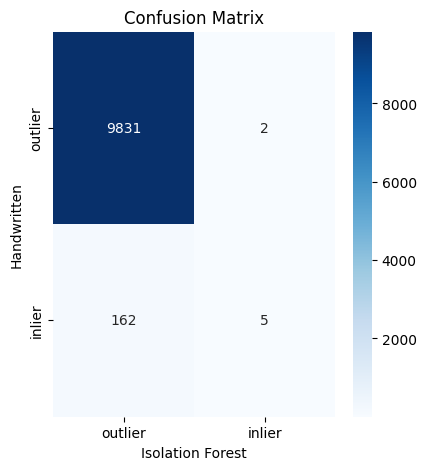

In [24]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [25]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [26]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")